## Cardiovascular Desease Bayesian Network

### Cardiovascular desease topic
Intro to cardiovascular deasease

### What's a Bayesian Network?
Sprazi di teoria

### Why a Bayesian Network?
Spiegare perché si è scelta

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Dataset
Piccola intro sul dataset

In [2]:
df = pd.read_csv('cardio_dataset.csv', sep=';')

In [2]:
train_set = pd.read_csv('cardio_train_set.csv', sep=';')
test_set = pd.read_csv('cardio_test_set.csv', sep=';')

#### Dataset Analysis

##### Description

In [3]:
# Shows first dataframe rows
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# 'age' column to years
df['age'] = (df['age'] / 365).astype(int)

In [5]:
df.describe().round(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0
mean,49972.42,52.84,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,28851.30,6.77,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.4,0.5
min,0.00,29.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,25006.75,48.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,50001.50,53.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,74889.25,58.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,99999.00,64.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


In [6]:
# Check null values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

##### Distribution Analysis

Numeric variable distribution

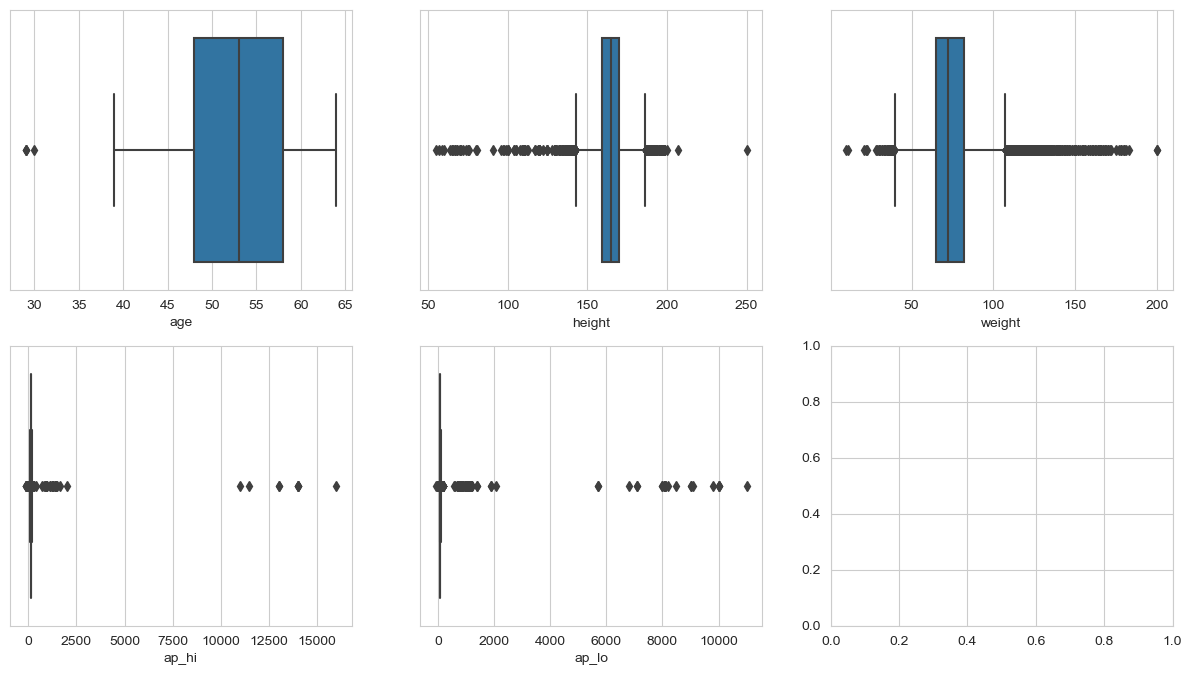

In [7]:
# Select the numeric columns
numeric_cols = ["age", "height", "weight", "ap_hi", "ap_lo"]

# Create boxplots for numeric columns
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_xlabel(col)

The above boxplots show the presence of several outliers. Considering the dataset of 70K samples, it is reasonable to assume that there are some exceptional cases related to physical conditions. Below, we use the Interquartile range (IQR) method to analyze the outliers of height.

In [8]:
# Calculate the interquartile range (IQR) of the "height" variable
Q1 = df["height"].quantile(0.25)
Q3 = df["height"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.6 * IQR
lower_bound = Q1 - 1.6 * IQR

# Find the outliers in the "height" variable
outliers = df[(df["height"] < lower_bound) | (df["height"] > upper_bound)]

# Print the number of outliers and their values
print("Number of outliers in height:", len(outliers))
outliers.head(10)
#outliers.to_csv('height_outliers.csv', index=False)


Number of outliers in height: 409


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
76,105,55,2,188,105.0,120,80,1,1,0,0,1,1
224,309,59,2,76,55.0,120,80,1,1,0,0,1,0
781,1086,63,1,141,60.0,120,80,1,1,0,0,1,1
1027,1432,41,2,195,111.0,148,86,1,1,0,0,1,1
1048,1456,40,1,140,68.0,100,70,1,1,0,0,0,0
1117,1554,60,2,198,68.0,120,80,1,1,0,0,1,1
2160,3049,44,2,196,74.0,140,90,1,1,1,1,1,1
2412,3399,61,2,138,52.0,140,100,1,1,0,0,1,1
2680,3778,52,2,194,89.0,110,70,1,1,0,0,1,0
2883,4058,55,1,190,74.0,120,80,1,1,0,0,1,0


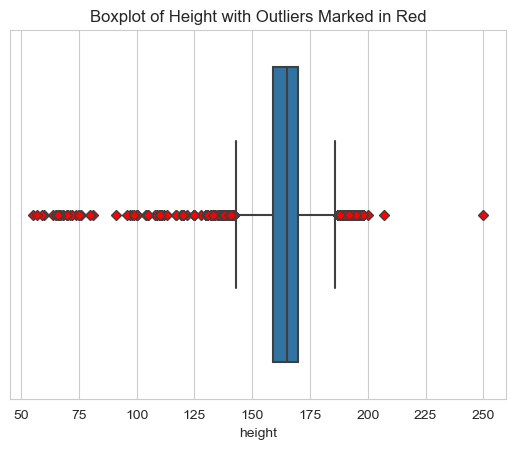

In [9]:
ax = sns.boxplot(x="height", data=df, flierprops={'markerfacecolor': 'red', 'marker': 'D'})
ax.set_title("Boxplot of Height with Outliers Marked in Red")

plt.show()

For now, it has been decided to keep the outliers.

Binary and class distribution

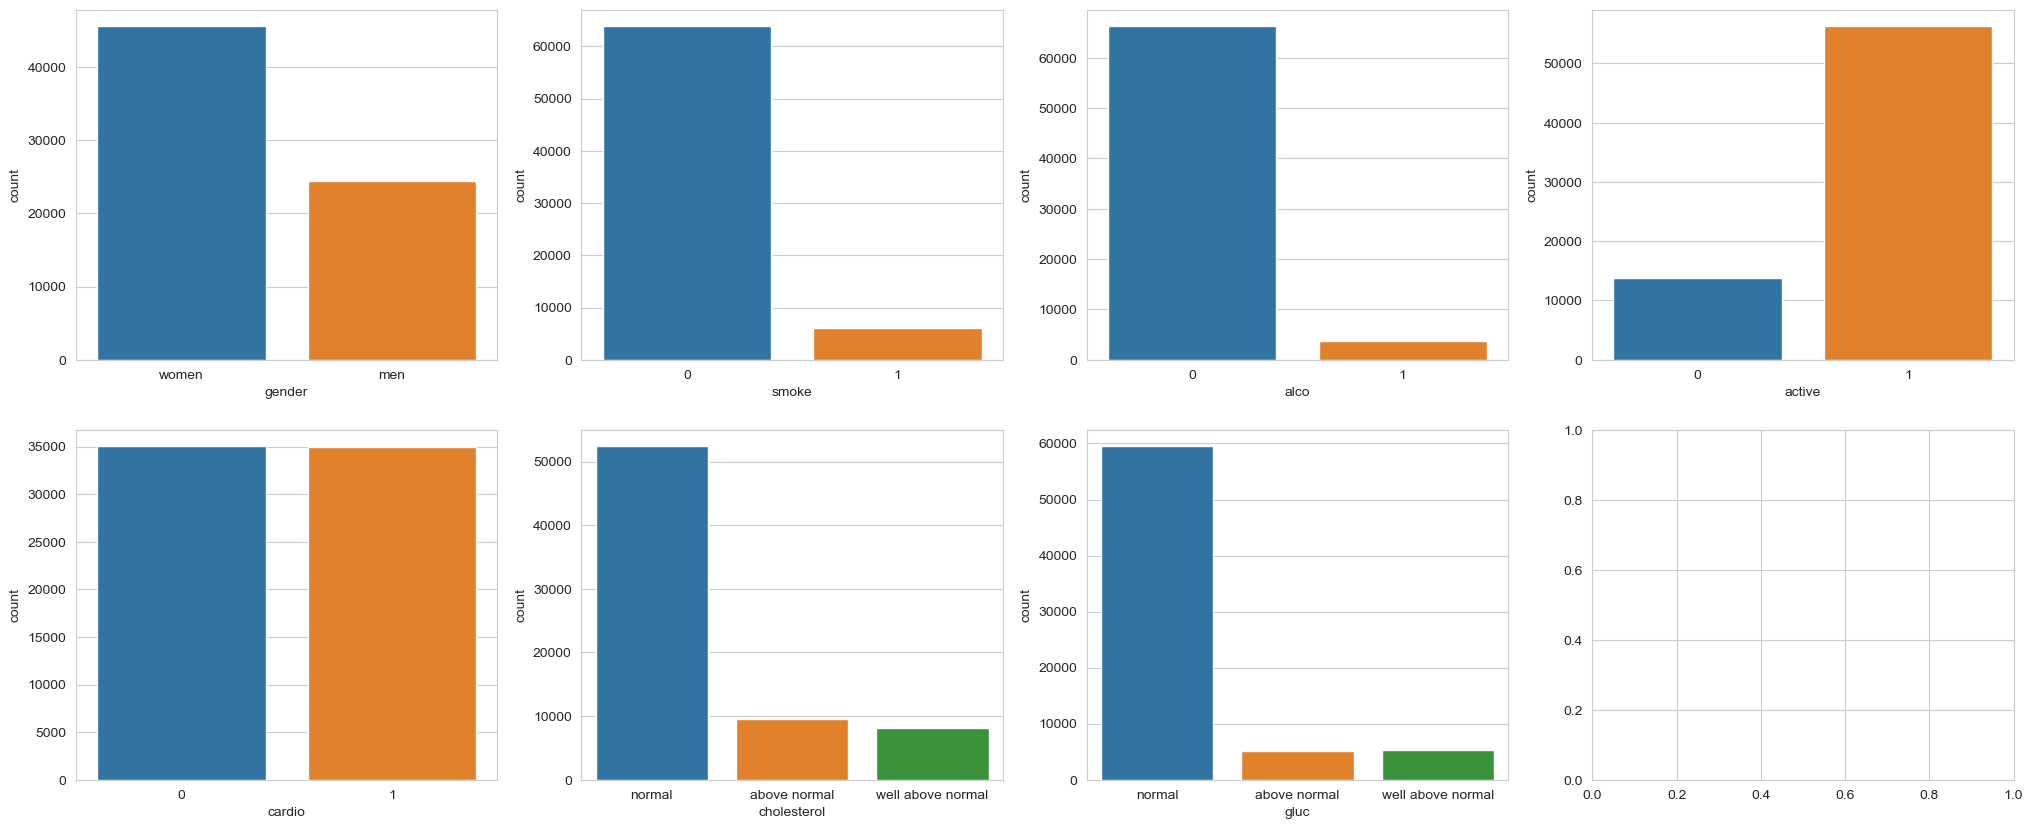

In [10]:
binary_cols = ["gender", "smoke", "alco", "active", "cardio"]
cat_cols = ["cholesterol", "gluc"]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
axes = axes.flatten()

for i, col in enumerate(binary_cols + cat_cols):
    if col == "gender":
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_xticklabels(["women", "men"])
    elif col in cat_cols:
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_xticklabels(["normal", "above normal", "well above normal"])
    else:
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_xlabel(col)


##### Correlation Matrix

Check the correlation among variables through a Pearson correlation matrix heatmap.

Text(0.5, 1.0, 'Correlation Heatmap')

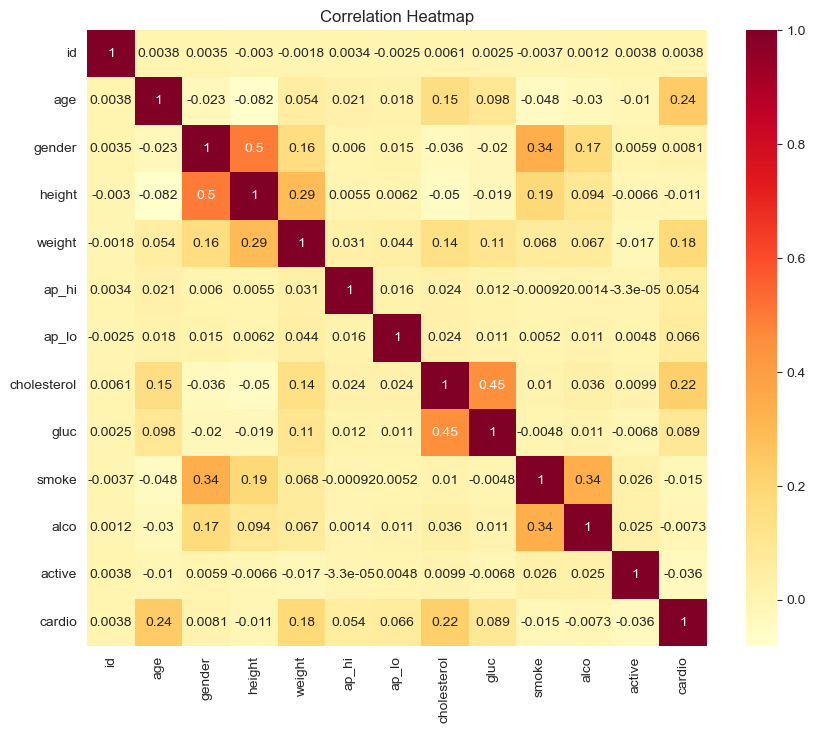

In [11]:
fig, ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot=True, ax=ax, cmap="YlOrRd")

# Set title
plt.title("Correlation Heatmap")

From the above correlation heatmap, some pairs of variables with a positive correlation can be observed, such as:
- (age, cardio)
- (gender, height)
- (gender, smoke)
- (height, weight)
- (weight, cardio)
- (cholesterol, gluc)
- (cholesterol, cardio)
- (smoke, alco)

Therefore, there is a certain correlation between the variables, specifically in the case of cardiovascular diseases, a positive correlation is observed with increasing age, weight, cholesterol, and partly with glucose.

In [ ]:
df = df.drop('id', axis=1)

### Splitting dataset into trainset and testset

In [4]:
# split dataset into 90-10
train_set, test_set = train_test_split(df, test_size=0.1)

# save to csv
test_set.to_csv('cardio_test_set.csv', index=False, sep=";")
train_set.to_csv('cardio_train_set.csv', index=False, sep=";")

#### Check trainset distribution

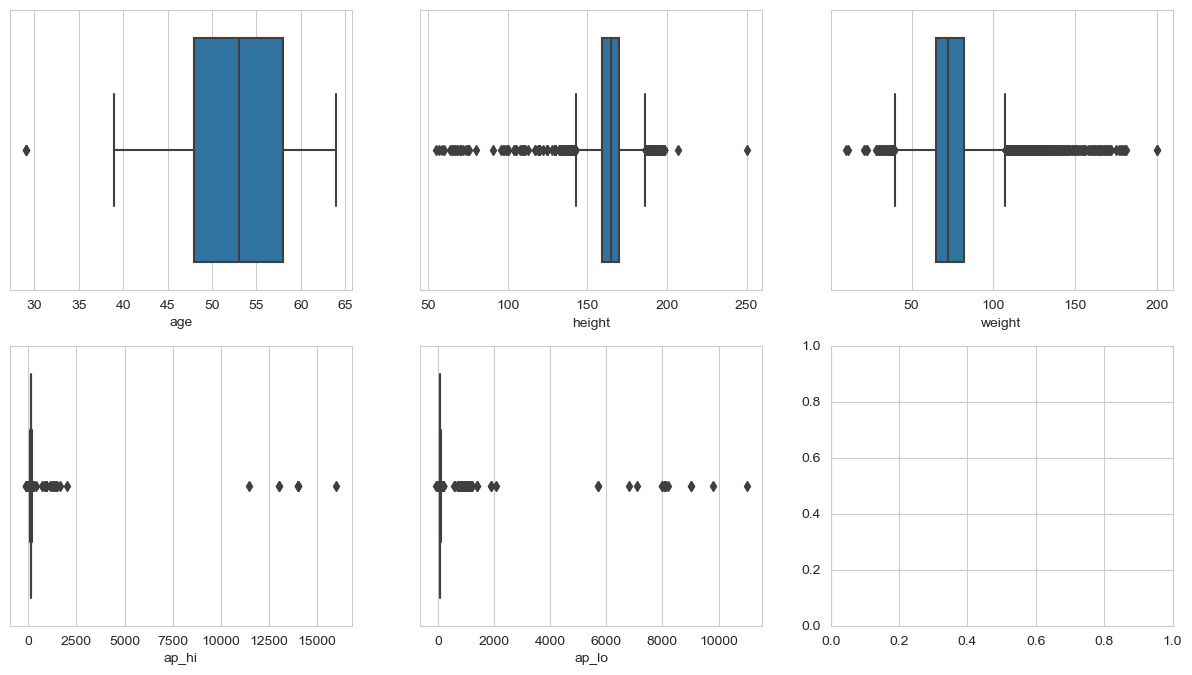

In [4]:
# Select the numeric columns
numeric_cols = ["age", "height", "weight", "ap_hi", "ap_lo"]

# Create boxplots for numeric columns
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=train_set[col], ax=axes[i])
    axes[i].set_xlabel(col)

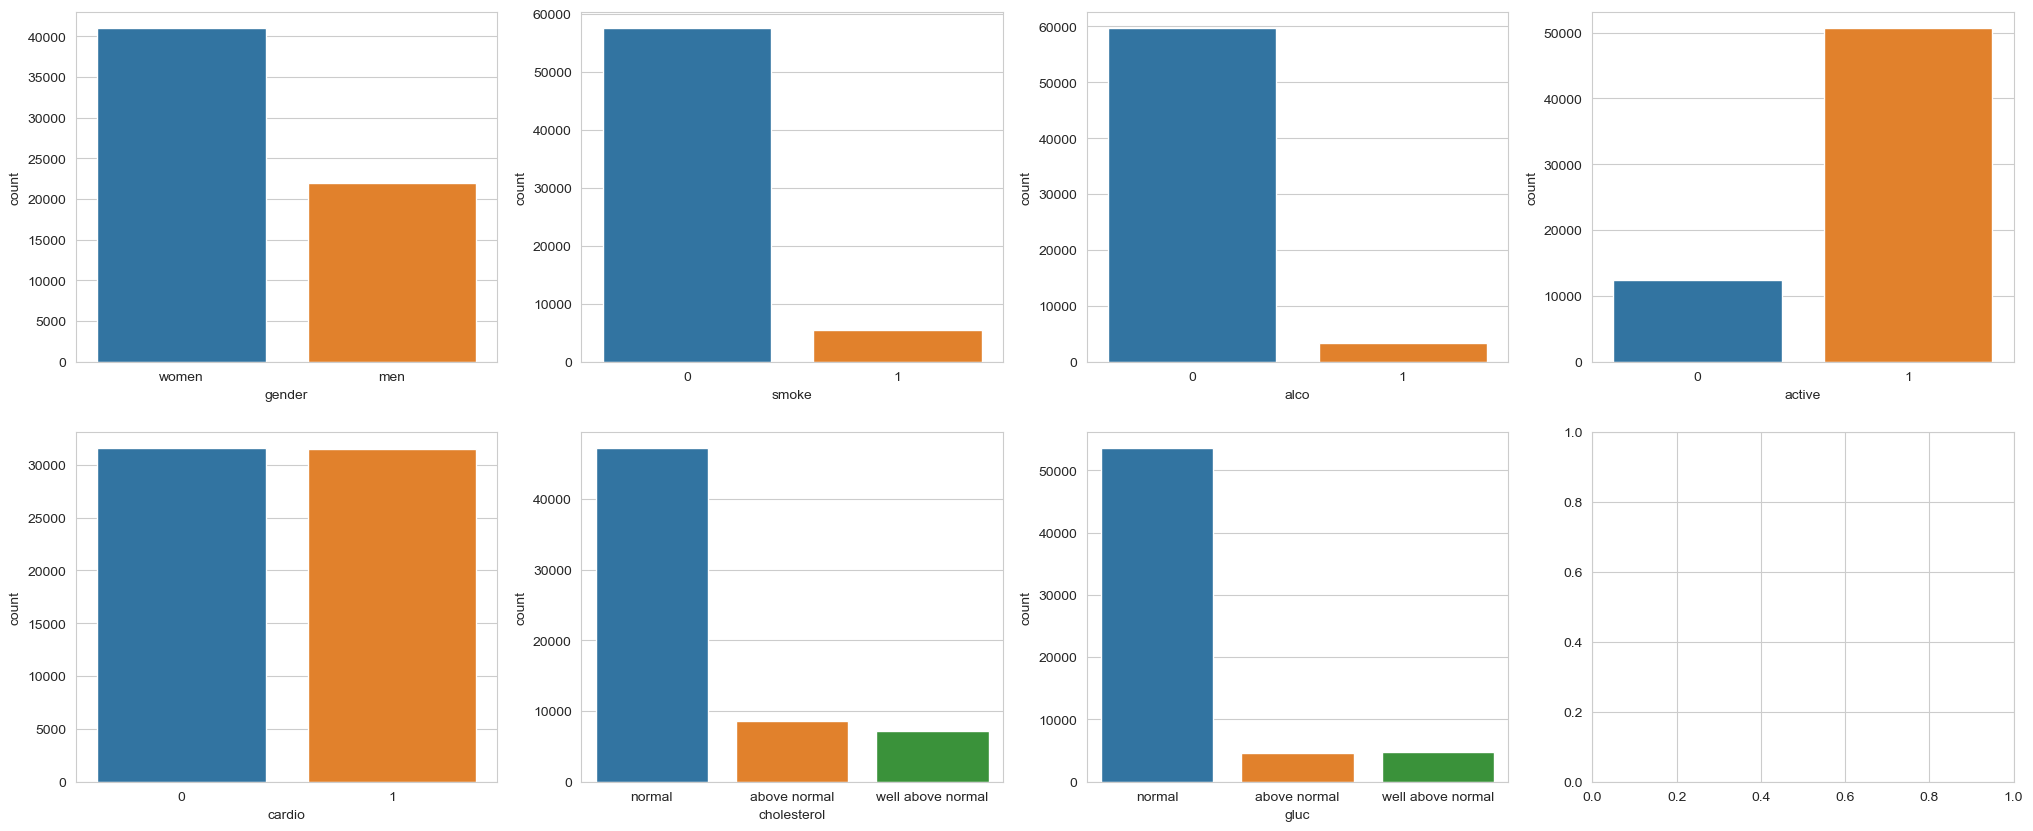

In [5]:
binary_cols = ["gender", "smoke", "alco", "active", "cardio"]
cat_cols = ["cholesterol", "gluc"]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
axes = axes.flatten()

for i, col in enumerate(binary_cols + cat_cols):
    if col == "gender":
        sns.countplot(x=col, data=train_set, ax=axes[i])
        axes[i].set_xticklabels(["women", "men"])
    elif col in cat_cols:
        sns.countplot(x=col, data=train_set, ax=axes[i])
        axes[i].set_xticklabels(["normal", "above normal", "well above normal"])
    else:
        sns.countplot(x=col, data=train_set, ax=axes[i])
        axes[i].set_xlabel(col)

### Build a Bayesian Network

### Output and Test